# Pacotes

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from scipy.stats import mannwhitneyu, chi2_contingency, norm, kruskal

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

## Funções

In [2]:
def missing_values_table(df):
    """
    Cria uma tabela resumindo a quantidade e a porcentagem de valores ausentes em cada coluna do DataFrame.

    Args:
    df (pd.DataFrame): DataFrame para análise de valores ausentes.

    Etapas:
    1. Calcular a quantidade total de valores ausentes por coluna.
    2. Calcular a porcentagem de valores ausentes em relação ao total de linhas.
    3. Concatenar as duas métricas em um novo DataFrame.
    4. Renomear as colunas do DataFrame resultante para maior clareza.
    5. Filtrar e ordenar o DataFrame para mostrar apenas colunas com valores ausentes, em ordem decrescente de porcentagem.
    6. Imprimir um resumo sobre a presença de valores ausentes no DataFrame.

    Returns:
    pd.DataFrame: Uma tabela com o número e a porcentagem de valores ausentes por coluna.
    """
    # Calculando o número total de valores ausentes por coluna.
    mis_val = df.isnull().sum()
    
    # Calculando a porcentagem de valores ausentes.
    mis_val_percent = 100 * mis_val / len(df)
    
    # Criando um DataFrame com o número e a porcentagem de valores ausentes.
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renomeando as colunas do DataFrame para clareza.
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Filtrando o DataFrame para mostrar apenas colunas com valores ausentes e ordenando-as.
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Imprimindo um resumo das colunas com valores ausentes.
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    return mis_val_table_ren_columns

## Config Básicas de gráficos

In [3]:
dic = {
    'font.sans-serif': ['Arial'],  # Fonte
    'font.family': ['Arial']}
sns.set_style(rc=dic)
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

## Dataset

In [48]:
# Carregar os dados
danishlc = pd.read_csv('danishlc.dat', sep='\t')

In [49]:
# Convertendo as variáveis categóricas em tipo 'category'
danishlc['Age'] = danishlc['Age'].astype('category')
danishlc['City'] = danishlc['City'].astype('category')

## Informações sobre o dataset

In [50]:
danishlc

,Cases,Pop,Age,City
0,11,3059,40-54,Fredericia
1,11,800,55-59,Fredericia
2,11,710,60-64,Fredericia
3,10,581,65-69,Fredericia
4,11,509,70-74,Fredericia
5,10,605,>74,Fredericia
6,13,2879,40-54,Horsens
7,6,1083,55-59,Horsens
8,15,923,60-64,Horsens
9,10,834,65-69,Horsens


In [51]:
danishlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Cases   24 non-null     int64   
 1   Pop     24 non-null     int64   
 2   Age     24 non-null     category
 3   City    24 non-null     category
dtypes: category(2), int64(2)
memory usage: 984.0 bytes


In [52]:
danishlc.describe()

,Cases,Pop
count,24.000000,24.000000
mean,9.333333,1100.333333
std,3.157691,842.232730
min,2.000000,509.000000
25%,7.000000,628.000000
50%,10.000000,791.000000
75%,11.000000,954.750000
max,15.000000,3142.000000


## Dados missing

In [53]:
missing_values_table(danishlc)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Countplot

### Age

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '40-54'),
  Text(1, 0, '55-59'),
  Text(2, 0, '60-64'),
  Text(3, 0, '65-69'),
  Text(4, 0, '70-74'),
  Text(5, 0, '>74')])

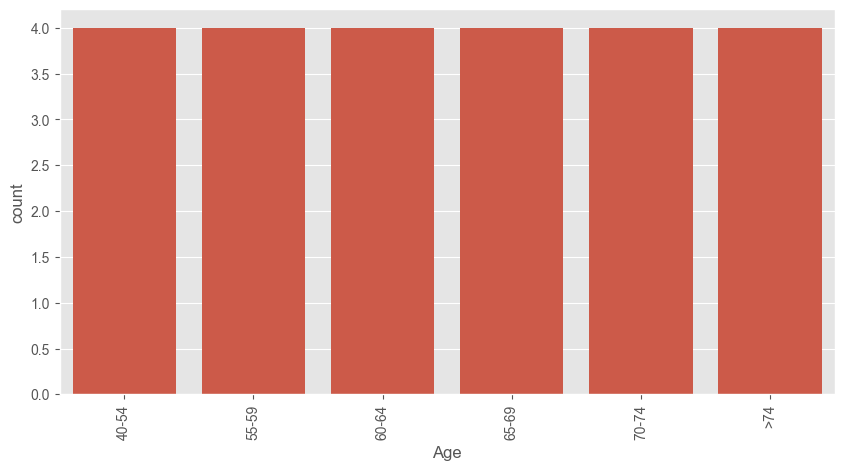

In [54]:
# Verificar outliers nas variáveis preditoras
plt.figure(figsize=(10, 5))
sns.countplot(data=danishlc, x='Age')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Fredericia'),
  Text(1, 0, 'Horsens'),
  Text(2, 0, 'Kolding'),
  Text(3, 0, 'Vejle')])

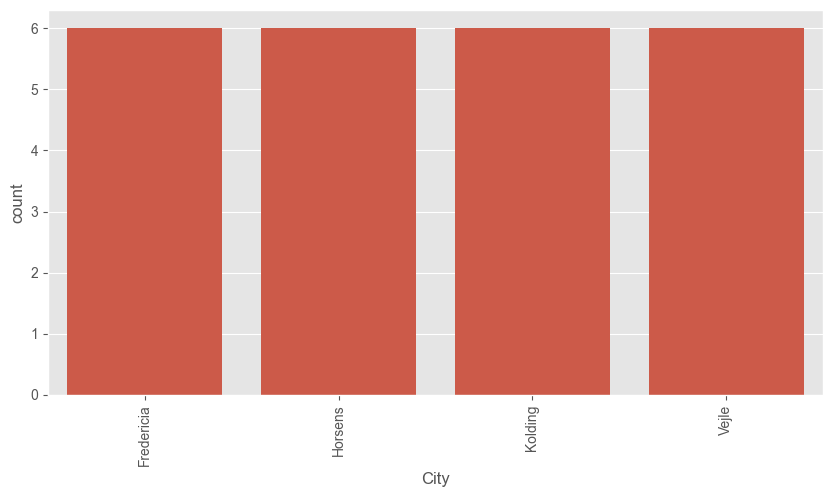

In [55]:
# Verificar outliers nas variáveis preditoras
plt.figure(figsize=(10, 5))
sns.countplot(data=danishlc, x='City')
plt.xticks(rotation=90)

## Boxplot 

### Pop

<Axes: ylabel='Pop'>

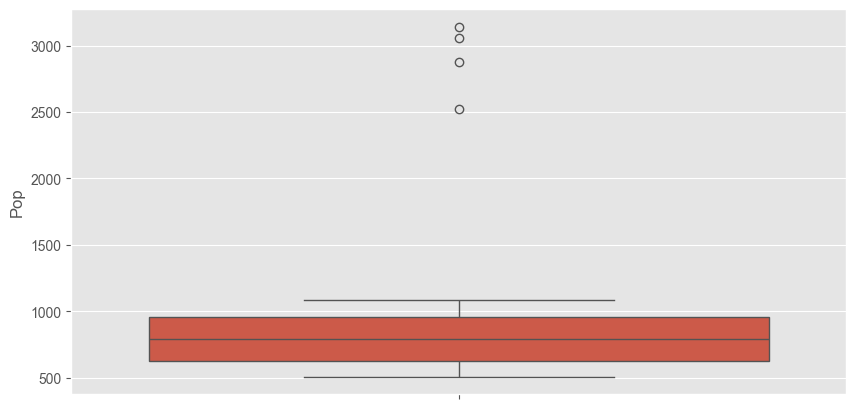

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=danishlc, y='Pop')

### Cases

<Axes: ylabel='Cases'>

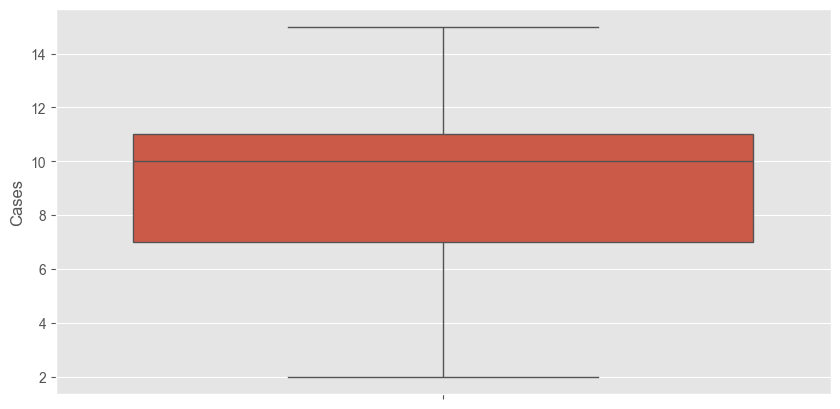

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=danishlc, y='Cases')

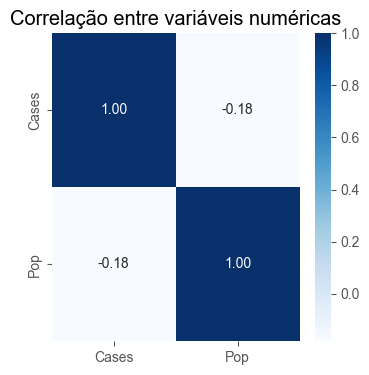

In [58]:
# Selecionar apenas colunas numéricas para a correlação
colunas_numericas = danishlc.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação apenas com as colunas numéricas
corr = colunas_numericas.corr()

# Criar um heatmap com a matriz de correlação
plt.rcParams['figure.figsize'] = [4, 4]
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlação entre variáveis numéricas')
plt.show()

## Ajuste Poisson

In [62]:
# Normalizar variáveis numéricas
#scaler = StandardScaler()
#danishlc[['Pop']] = scaler.fit_transform(danishlc[['Pop']])

# Ajustar o modelo de Poisson
modelo_poisson = smf.poisson('Cases ~ Age + City', data=danishlc).fit(offset=np.log(danishlc['Pop']))

# Resumo do modelo
print(modelo_poisson.summary())

Optimization terminated successfully.
         Current function value: 2.438772
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:                  Cases   No. Observations:                   24
Model:                        Poisson   Df Residuals:                       15
Method:                           MLE   Df Model:                            8
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                 0.05666
Time:                        18:19:32   Log-Likelihood:                -58.531
converged:                       True   LL-Null:                       -62.046
Covariance Type:            nonrobust   LLR p-value:                    0.5333
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2437      0.204     11.019      0.000       1.845       2.643
Age[T.55-59]  

C:\Users\pedro\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: offset. After release 0.14, this will raise.
  warnings.warn(


#### Análise dos resíduos

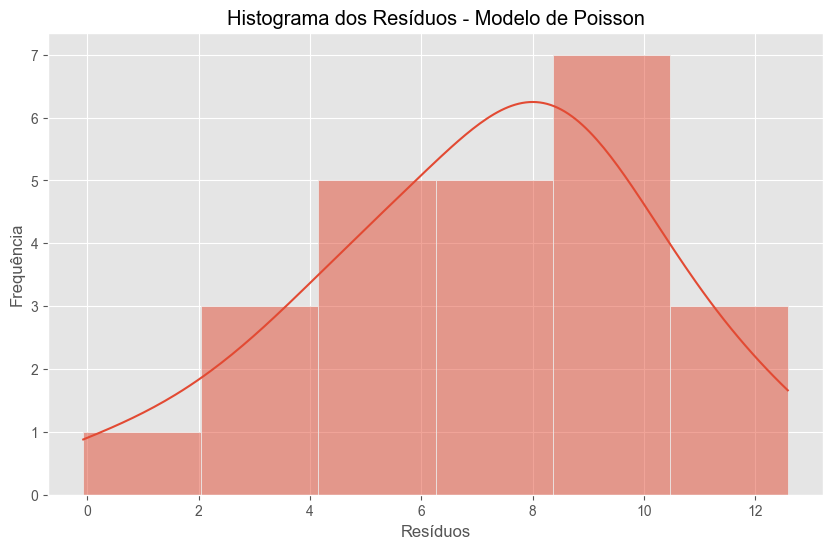

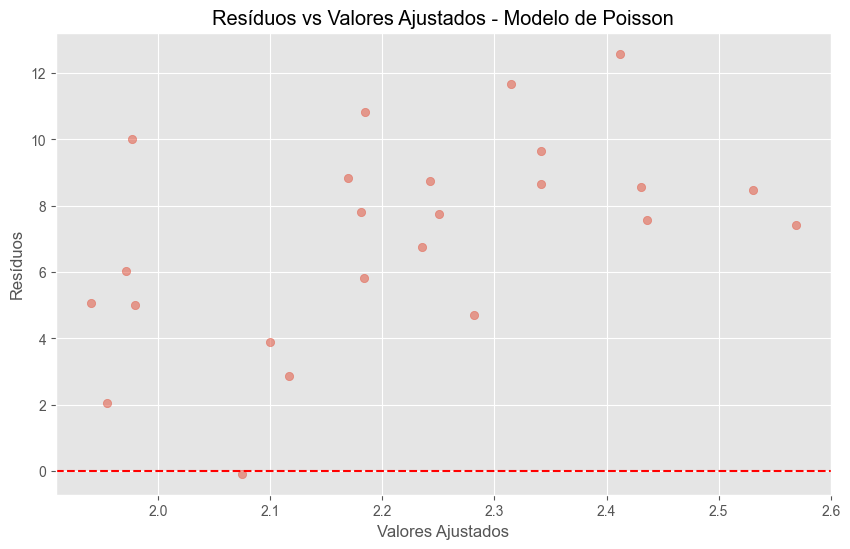

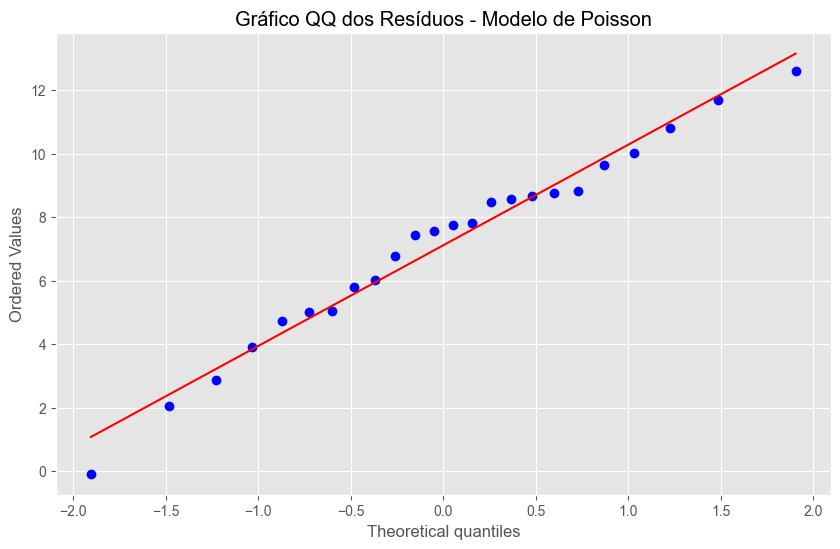

In [60]:
# Previsões do modelo
y_pred = modelo_poisson.fittedvalues

# Calcular resíduos
residuos = danishlc['Cases'] - y_pred

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos - Modelo de Poisson')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão dos resíduos versus valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados - Modelo de Poisson')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

# Gráfico QQ
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico QQ dos Resíduos - Modelo de Poisson')
plt.show()